# Harry Potter Web Scraping and Data Cleaning

Hi! In this project I scraped https://harrypotter.fandom.com/wiki/List_of_spells#A to get information about all spells from Harry Potter universum. I focused more on web scraping, data cleaning and data set preparation rather than on analysis. 

During analysis of page source I found that spells are displayed alphabetically in many different div tags, also part of them were in table (tl tag) and rest of them in description list (dl tag), so it was easier to scrap over full page source rather than particular div tags. Lot of descriptions are misspelled and have redundant elements, which need cleaning.

In [1]:
#importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests 
from bs4 import BeautifulSoup

In [2]:
#using requests to get data
url = 'https://harrypotter.fandom.com/wiki/List_of_spells#A'
page = requests.get(url)

print(f'Page response: {page}')

Page response: <Response [200]>


In [3]:
soup = BeautifulSoup(page.content, 'html.parser')

## Number of spells

In [28]:
#All spells are stored at h3 tag. I will check total number of spells to be sure that the final data frame has correct length and values.
spells = soup.find_all('h3')
spells_list = []
for spell in spells:
    if spell.find('a') != None:
        spells_list.append(spell.find('a').getText())

print(f'Number of spells: {len(spells_list)}')
print(spells_list)

Number of spells: 313
['Aberto', 'Accio', 'Age Line', 'Aguamenti', 'Alarte Ascendare', "Albus Dumbledore's forceful spell", 'Alohomora', 'Amato Animo Animato Animagus', 'Anapneo', 'Anteoculatia', 'Anti-Cheating Spell', 'Anti-Disapparition Jinx', 'Anti-intruder jinx', "Antonin Dolohov's curse", 'Aparecium', 'Appare Vestigium', 'Apparition', 'Aqua Eructo', 'Arania Exumai', 'Arresto Momentum', 'Arrow-shooting spell', 'Ascendio', 'Avada Kedavra', 'Avifors', 'Avenseguim', 'Avis', 'Babbling Curse', 'Badgering', 'Bat-Bogey Hex', 'Baubillious', 'Bedazzling Hex', 'Bewitched Snowballs', 'Bluebell Flames', 'Blue sparks', 'Bombarda', 'Bombarda Maxima', 'Brackium Emendo', 'Bravery Charm', 'Bridge-conjuring spell', 'Broom jinx', 'Bubble-Head Charm', 'Bubble Spell', 'Calvorio', 'Cantis', 'Capacious extremis', 'Carpe Retractum', 'Cascading Jinx', 'Caterwauling Charm', 'Cauldron to Sieve', 'Cauldron to badger', 'Cave inimicum', 'Celescere', 'Cheering Charm', 'Circumrota', 'Cistem Aperio', 'Colloportus'

## List with all needed elements

In [82]:
#In this code I will scrap over full page and I will create one list with all needed elements (spells name, type and other descriptions)

children = soup.find_all()
list = []
for child in children:
    if child.name == 'tr':    # some of descriptions are stored at tr tag and some at dl tag
        row_of_child = child.find('td')
        list.append(row_of_child.getText())
    elif child.name == 'dl':
        dl_parent = child.find_all('dd')
        for dd in dl_parent:
            list.append(dd.getText())
    elif child.name == 'h3':  # all spells names are stored in h3 tag
        if child.find('a') != None:  # some of h3 tags are empty and no needed so I prevent to look a tag inside them 
            list.append( child.find('a').getText())

In [83]:
list[:10]

['\n',
 '\n',
 'Aberto',
 'Type: Charm',
 'Pronunciation: Ah-bare-toh',
 'Description: A spell used to open doors.[1]',
 "Etymology: Portuguese for 'open'. Compare Spanish 'abierto'.",
 'Accio',
 'Type: Charm\n',
 'Pronunciation: Various, including: AK-ee-oh or AK-see-oh , AK-see-oh , AS-see-oh (US), and AT-chee-oh (Anglo-Catholic pronunciation)\n']

Now when I have all needed strings in one list, I will prepare this and split to dictionary.

Most of errors, which are corrected with code below I find and the end of program, when I compare data frame to spells list. When I find some errors I added code here and run program again. Manualy looking through the list before splitting into data frame would be too laborius.

In [84]:
for row in range(len(list)):
    list[row] = list[row].replace('\n', '')     
    list[row] = list[row].replace('Suggested Etymology', 'Etymology')
    list[row] = list[row].replace('Seen/mentioned', 'Seen/Mentioned')
    if list[row][:4] in 'Note':         #Lot of "Notes" has errors like: "Note:", "Notes [different numbers]", in this code I correct all of them, without chenging other values 
        split_row = list[row].split(':')[0]  #with this value I can check if Notes prefix is misspelled or not
        #If I used only first condition, for loop would not repair 'Note' error, so I added second length condition
        if (split_row not in 'Notes') or (len(split_row) != 5 and len(split_row) != 0):      
            list[row] = list[row].replace(split_row, 'Notes')
list[:10]

['',
 '',
 'Aberto',
 'Type: Charm',
 'Pronunciation: Ah-bare-toh',
 'Description: A spell used to open doors.[1]',
 "Etymology: Portuguese for 'open'. Compare Spanish 'abierto'.",
 'Accio',
 'Type: Charm',
 'Pronunciation: Various, including: AK-ee-oh or AK-see-oh , AK-see-oh , AS-see-oh (US), and AT-chee-oh (Anglo-Catholic pronunciation)']

In [85]:
# here I deleted empty strings
list = [i for i in list if i]
list[:10]

['Aberto',
 'Type: Charm',
 'Pronunciation: Ah-bare-toh',
 'Description: A spell used to open doors.[1]',
 "Etymology: Portuguese for 'open'. Compare Spanish 'abierto'.",
 'Accio',
 'Type: Charm',
 'Pronunciation: Various, including: AK-ee-oh or AK-see-oh , AK-see-oh , AS-see-oh (US), and AT-chee-oh (Anglo-Catholic pronunciation)',
 'Description: Summons an object towards the caster. It is able to summon objects in direct line of sight of the caster, as well as things out of view, by calling the object aloud after the incantation (unless the spell is casted nonverbally). This spell needs thought behind it, and the object must be clear in the casters mind before trying to summon it.[2] The caster doesn\'t necessarily need to know the location of the target if they say the name of the object to be summoned, such as when Hermione Granger summoned some books from Dumbledore\'s office simply by saying "Accio Horcrux books!" while in Gryffindor Tower.',
 "Seen/Mentioned: Harry Potter summone

List is ready to be splitted to data frame.

## Creating data frame


Here I will create for loop, which check each value in list and move this value to temporary variables. <br/>
Variables will be then used to expand dictionary, one "row" in dictionary will contains description of spell. <br/>
This temporary variables need be set to None of begining of each new spell, becouse some spells need to have null values. <br/>
Every time then loop will find name of new spell, will expand dictionary, reset temporary variables and again will move new valiues to this temporary variables.

In [86]:
def set_variables_to_none():
    """
    This funcion change or create global temporary values to None, thanks to this funciont data frame will has correct shape and null values.

    Input: None
    Output: create or change global temporary variables 
    """
    global xName, xType, xPron, xDesc, xSeen, xEty, xNotes 
    xName = xType = xPron = xDesc = xSeen = xEty = xNotes = None 
    return xName, xType, xPron, xDesc, xSeen, xEty, xNotes 

In [87]:
def update_dict():
    """
    This funcion will expand dictionary, with values from temporary variables

    Input: None
    Output: update global spells_dict
    """
    global spells_dict
    spells_dict['Name'].append(xName)
    spells_dict['Type'].append(xType)
    spells_dict['Pronunciation'].append(xPron)
    spells_dict['Description'].append(xDesc)
    spells_dict['Seen/Mentioned'].append(xSeen)
    spells_dict['Etymology'].append(xEty)
    spells_dict['Notes'].append(xNotes)
    

In [100]:
prefixes = ['Type','Pronunciation','Description','Seen/Mentioned','Etymology','Notes']  #for loop will check if value from list has prefix

#creating dictionary, which will be used to create Data Frame
spells_dict = {'Name':[],'Type':[],'Pronunciation':[], 'Description':[], 'Seen/Mentioned':[],'Etymology':[],'Notes':[]}

#preparing temporary varaibles
set_variables_to_none()

for x in range(len(list)):
#only names of spells have not prefixes, so when it will find name, it will update dict with values from previous spell, reset temp values check values for new spell
    if str(list[x]).split(':')[0] not in prefixes:  
        update_dict()
        set_variables_to_none()
        xName = list[x]  
    #in elifs loop check what is tape of description and move value to correct temporary values
    elif 'Type' in str(list[x]): 
        xType = list[x]
    elif 'Pronunciation' in str(list[x]):
        xPron = list[x]
    elif 'Description' in str(list[x]):
        xDesc = list[x]
    elif 'Seen/Mentioned' in str(list[x]):
        xSeen = list[x]
    elif 'Etymology' in str(list[x]):
        xEty = list[x]
    elif 'Notes' in str(list[x]):
        xNotes = list[x]
    #this if will add last spell to list (without it for loop will not add last spell, becouse there is no more spells to activate update_dict())
    if x + 1 == len(list):
        update_dict()
        break

Here I will create data frame from dictionary. Becouse of for loop, first row in empty so I will delete it.

In [101]:
df = pd.DataFrame(spells_dict)
df = df.iloc[1:]
df.head()

,Name,Type,Pronunciation,Description,Seen/Mentioned,Etymology,Notes
1,Aberto,Type: Charm,Pronunciation: Ah-bare-toh,Description: A spell used to open doors.[1],None,Etymology: Portuguese for 'open'. Compare Span...,None
2,Accio,Type: Charm,"Pronunciation: Various, including: AK-ee-oh or...",Description: Summons an object towards the cas...,Seen/Mentioned: Harry Potter summoned his broo...,"Etymology: The Latin word accio means ""I call""...",Notes: The Summoning Charm is unable to direct...
3,Age Line,Type: Charm,None,Description: Prevents people above or below a ...,Seen/Mentioned: Used by Albus Dumbledore to st...,None,None
4,Aguamenti,"Type: Charm, Conjuration",Pronunciation: AH-gwah-MEN-tee,"Description: Produces a clean, drinkable jet o...",Seen/Mentioned: Used by Fleur Delacour in 1994...,Etymology: Possibly a hybrid of Latin words aq...,None
5,Alarte Ascendare,Type: Charm,Pronunciation: a-LAR-tay a-SEN-der-ay,Description: Shoots the target high into the air.,Seen/Mentioned: Used by Gilderoy Lockhart in 1...,Etymology: Ascendere is a Latin infinitive mea...,None


Data frame looks good, it only need little cleaning and will be ready for analysis.

In [102]:
# Lot of spells has multiple types, so I will split them to main type and to secondary type
df.Type.unique()

array(['Type: Charm', 'Type: Charm, Conjuration', 'Type: Spell',
       'Type: Transfiguration', 'Type: Healing Spell, Vanishment',
       'Type: Dark charm', 'Type: Jinx', 'Type: Curse',
       'Type: Transportation', 'Type: Conjuration',
       'Type: Conjuration, Charm', 'Type: Hex', 'Type: Charm[15]',
       'Type: Charm, Healing Spell', None, 'Type: Transfiguration, Jinx',
       'Type: Jinx, Transfiguration', 'Type: Healing Spell',
       'Type: Conjuration, Healing spell', 'Type: Counter-Spell',
       'Type: Conjuration, Dark Arts', 'Type: Dark Arts',
       'Type: Curse, Jinx', 'Type: Counter-Jinx', 'Type: Counter-Charm',
       'Type: Unknown', 'Type: Untransfiguration', 'Type: Jinx, Hex',
       'Type: Counter-charm', 'Type: Vanishment'], dtype=object)

In [103]:
# during splitting, padnas gave future warning, which is not usefull for me in this program so I turned this off
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

Cleaning dataset

In [104]:

df.Type = df.Type.str[6:]  #Removing Type prefix
df.Type = df.Type.str.replace('\[\d+\]','') #removing "[some numbers]" from strings
# splitting type column to 2 columns
df['Second_Type'] = df['Type'].str.split(', ', expand=True)[1] 
df.Type = df['Type'].str.split(', ', expand=True)[0]

# removing prefixes and "[some numbers]"
df.Pronunciation = df.Pronunciation.str[15:]

df.Description = df.Description.str[13:]
df.Description = df.Description.str.replace('\[\d+\]','')

df['Seen/Mentioned'] = df['Seen/Mentioned'].str[16:] #here I used square brackets becouse of "/" in column name
df.Etymology = df.Etymology.str[11:]
df.Notes = df.Notes.str[7:]



## Checking final Data Frame

In [105]:
df.head()

,Name,Type,Pronunciation,Description,Seen/Mentioned,Etymology,Notes,Second_Type
1,Aberto,Charm,Ah-bare-toh,A spell used to open doors.,None,Portuguese for 'open'. Compare Spanish 'abierto'.,None,None
2,Accio,Charm,"Various, including: AK-ee-oh or AK-see-oh , AK...",Summons an object towards the caster. It is ab...,Harry Potter summoned his broom to complete th...,"The Latin word accio means ""I call"" or ""I summ...",The Summoning Charm is unable to directly summ...,None
3,Age Line,Charm,None,Prevents people above or below a certain age f...,Used by Albus Dumbledore to stop underage stud...,None,None,None
4,Aguamenti,Charm,AH-gwah-MEN-tee,"Produces a clean, drinkable jet of water from ...",Used by Fleur Delacour in 1994 to extinguish h...,"Possibly a hybrid of Latin words aqua, which m...",None,Conjuration
5,Alarte Ascendare,Charm,a-LAR-tay a-SEN-der-ay,Shoots the target high into the air.,Used by Gilderoy Lockhart in 1992 to send a sn...,"Ascendere is a Latin infinitive meaning ""to go...",None,None


In [106]:
df.shape

(313, 8)

Data frame has correct shape and looks clean. 

At first I missed some spells or add few wrong rows, so with this for loops below I compare data frame to list of spells names. <br/> If I found something I added additional
conditions to cleaning loop and run program again until I no longer had wrong values

In [107]:
# Here I check if there is some spells in spells list which are not mentioned in data frame
counter = 0
for x in spells_list:
    if x not in df.Name.values:
        counter += 1
        print(x)
        
print(f'Number of errors: {counter}')

Number of errors: 0


In [108]:
# Here I check if there is some additional wrong spells in data frame, which are not mentioned in data frame  (for example for loop could take 'Notes [4]:' as new spell)
counter = 0
for x in df.Name.values:
    if x not in spells_list:
        counter += 1
        print(x)

print(f'Number of errors: {counter}')

Number of errors: 0


## Nubmer of spells by type

Here I created basic chart, to check if data frame is ready for some analysis. I did not do anything more with this dataset, becouse I achieved my goal of web scrapping and data cleaning.

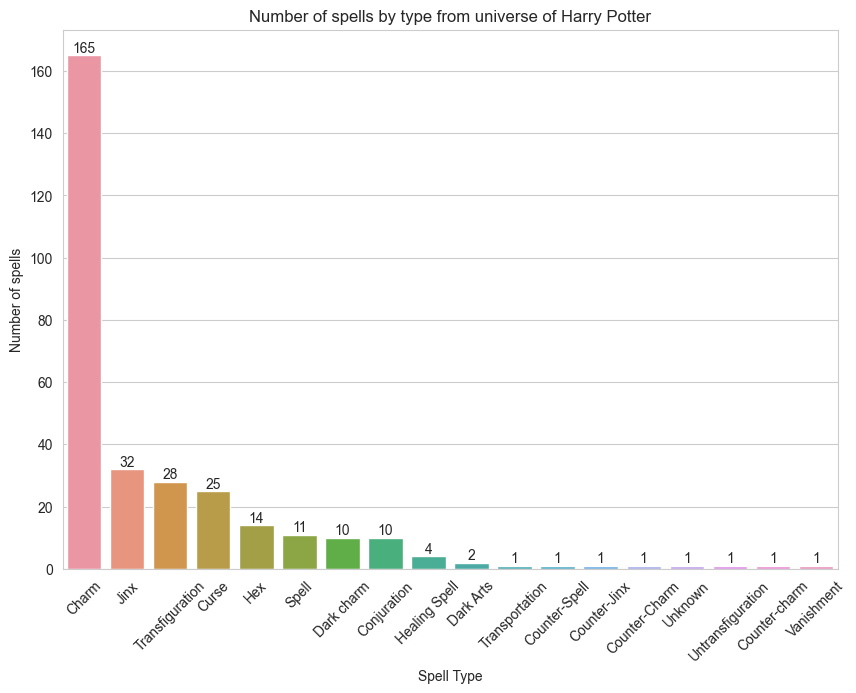

In [109]:
sns.set_style('whitegrid')

order = df.Type.value_counts().index 

ax = plt.figure(figsize=(10,7))
ax = sns.countplot( data = df, x = 'Type', order = order)
ax.bar_label(ax.containers[0]) # adding value to each bar

ax.set_ylabel('Number of spells')
ax.set_xlabel('Spell Type')
plt.title('Number of spells by type from universe of Harry Potter')
plt.xticks(rotation=45)
plt.show()

# Thanks for reading

Autor: Łukasz 